# Advanced Regression Assignment - Ridge And Lasso 

#### Import the Required Library

In [3208]:
import numpy as np # For Numeric calculation
import pandas as pd   # for dataframe 

# for visvualzation
import matplotlib.pyplot as plt   
import seaborn as sns

# sklearn library
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option("display.max_columns" ,None)  # displaying the no of the column in the notebook
pd.set_option('display.max_rows',100)   # displaying all the records in the notebook for anaylsis

## Data Understanding

In [3209]:
#import the csv
df = pd.read_csv('train.csv')

In [3210]:
# checking the head of the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3211]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [3212]:
# checking the shape of the data
df.shape

(1460, 81)

In [3213]:
# checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3214]:
df.describe([0.25,0.50,0.75,0.90])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,7550

In [3215]:
# checking the null values is present or not
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [3216]:
# checking the null values in percentage wise
round(100*df.isnull().sum()/len(df),2).sort_values(ascending = False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

##### Considering 10% as my threshold values and dropping the column having more than the threshold values

In [3217]:
# checking the columns having 10% more missing values
dropping_missing_columns = []
for i in df.columns:
    if round(100*df[i].isnull().sum()/ len(df[i]),2) > 10:
        dropping_missing_columns.append(i)       

In [3218]:
dropping_missing_columns

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [3219]:
# dropping the columns
df.drop(dropping_missing_columns , inplace=True ,axis = 1)

In [3220]:
# checking the shape after dropping
df.shape

(1460, 75)

##### checking the columns having less than 10% of missing values

In [3221]:
round(df.isnull().sum()/len(df),2)[round(df.isnull().sum()/len(df),2) > 0.00]

MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

In [3222]:
df[['MasVnrType' , 'MasVnrArea' ,'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
    'GarageType','GarageYrBlt','GarageFinish' ,'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MasVnrType    1452 non-null   object 
 1   MasVnrArea    1452 non-null   float64
 2   BsmtQual      1423 non-null   object 
 3   BsmtCond      1423 non-null   object 
 4   BsmtExposure  1422 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   GarageType    1379 non-null   object 
 8   GarageYrBlt   1379 non-null   float64
 9   GarageFinish  1379 non-null   object 
 10  GarageQual    1379 non-null   object 
 11  GarageCond    1379 non-null   object 
dtypes: float64(2), object(10)
memory usage: 137.0+ KB


In [3223]:
# checking the columns with missing data..
missing_columns_df = df[['MasVnrType' , 'MasVnrArea' ,'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
    'GarageType','GarageYrBlt','GarageFinish' ,'GarageQual', 'GarageCond']]

In [3224]:
# checking the values count for the categorical column
for i in missing_columns_df.columns:
    if df[i].dtypes == 'object':
        print(i+':','\n',df[i].value_counts() ,'\n','++++++++++++++++++++++++++++++++++++')

MasVnrType: 
 None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64 
 ++++++++++++++++++++++++++++++++++++
BsmtQual: 
 TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64 
 ++++++++++++++++++++++++++++++++++++
BsmtCond: 
 TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64 
 ++++++++++++++++++++++++++++++++++++
BsmtExposure: 
 No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64 
 ++++++++++++++++++++++++++++++++++++
BsmtFinType1: 
 Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64 
 ++++++++++++++++++++++++++++++++++++
BsmtFinType2: 
 Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 
 ++++++++++++++++++++++++++++++++++++
GarageType: 
 Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 
 +++++++++++++++++++++++++++++++++

- <b> From the Above Analysis , for categorical column we are imputing the mode values as the missing value is less in percentage<b/>

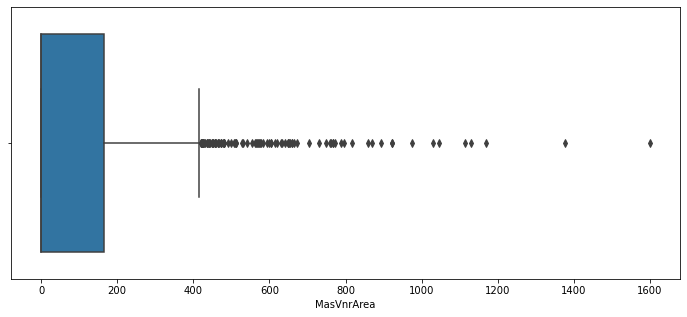

In [3225]:
# checking for numerical values
# plotting the box plot for checking the outliners..
plt.figure(figsize=[12,5])
sns.boxplot(df['MasVnrArea'])
plt.show()

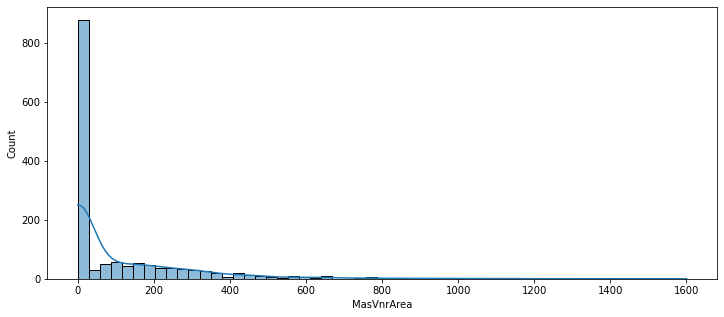

In [3226]:
plt.figure(figsize=[12,5])
sns.histplot(df['MasVnrArea'] , kde = True)
plt.show()

In [3227]:
df[df['MasVnrArea'].values > 0]['MasVnrArea'].median()

203.0

In [3228]:
df[df['MasVnrArea'].values > 0]['MasVnrArea'].mean()

254.7394247038917

#### As we have seen there are some outliers are present in the data , it is better to use median to impute missing values. As the mean affect alot in case of outliers

In [3229]:
df.MasVnrType.fillna('None',inplace=True)
df.MasVnrArea.fillna(df[df['MasVnrArea'].values > 0]['MasVnrArea'].median(),inplace=True)
df.BsmtQual.fillna('TA',inplace=True)
df.BsmtCond.fillna('TA',inplace=True)
df.BsmtExposure.fillna('No',inplace=True)
df.BsmtFinType1.fillna('Unf',inplace=True)
df.BsmtFinType2.fillna('Unf',inplace=True)
df.GarageType.fillna('Attchd',inplace=True)
df.GarageFinish.fillna('Unf',inplace=True)
df.GarageQual.fillna('TA',inplace=True)
df.GarageCond.fillna('TA',inplace=True)

#### Now we have to check for 'GarageYrBlt' column which is the data column

In [3230]:
df['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

#### For the 4 years column we create the Age of house, Garage Age , remodelAge and drop all the columns

In [3231]:
df['Age_house'] = df['YrSold'] - df['YearBuilt']
df['garage_age'] = df['YrSold'] - df['GarageYrBlt']
df['remodel_age'] = df['YrSold'] - df['YearRemodAdd']

In [3232]:
# dropping the years columns
df = df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [3233]:
# now checking the shape of the dataframe
df.shape

(1460, 74)

In [3234]:
# checking the null values 
round(df.isnull().sum()/len(df),2)[round(df.isnull().sum()/len(df),2) > 0.00]

garage_age    0.06
dtype: float64

#### Imputing the Garage Age as 0. If there is no garage , no Age

In [3235]:
df['garage_age'] = df['garage_age'].fillna(0)  

### Now there is no null values in the dataframe

# Data Visualisation - Applying EDA on dataset

In [3236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [3237]:
# segregating the column

category_column = []
numerical_column = []

for i in df.columns:
    if df[i].dtype == 'object':
        category_column.append(i)
    elif df[i].dtype == 'int64':
        numerical_column.append(i)
        

In [3238]:
print(len(category_column))
print(len(numerical_column))

38
34


#### For the  categorical column we can create Box plot w.r.t to SalePrice 

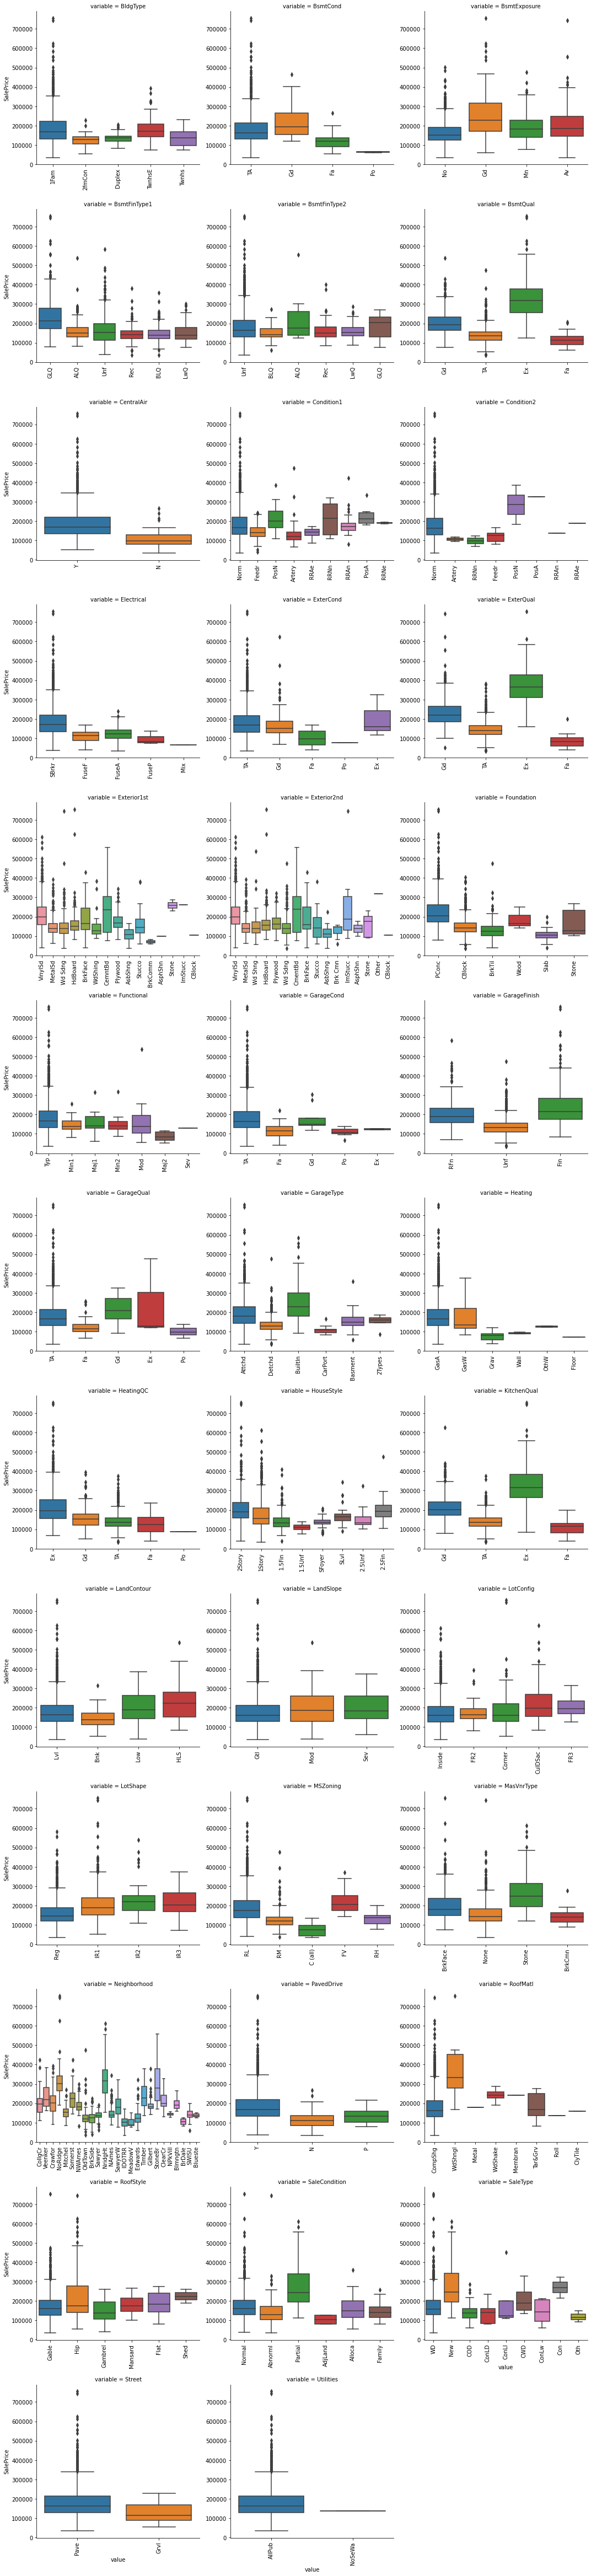

In [3239]:
# Plotting Categorical Features with Sale Price
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = df.select_dtypes(exclude=['int64','float64'])
f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(df[category_column]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

- From the Above analysis, we found out that there is a outliers present in data. So we will handle outliers in feature engineering section

### Checking Value Count for every categorical column to check the imbalance in data

In [3240]:
for i in category_column:
    print( df[i].value_counts())
    print('% OF data belong to one class : ',(100*df[i].value_counts()[0]/ len(df[i])))
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
% OF data belong to one class :  78.83561643835617
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Pave    1454
Grvl       6
Name: Street, dtype: int64
% OF data belong to one class :  99.58904109589041
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
% OF data belong to one class :  63.35616438356164
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
% OF data belong to one class :  89.79452054794521
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
% OF data belong to one class :  99.93150684931507
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

From the analysis of above columns <b> Street , Utilities ,LandSlope, condition1 , condition2,RoofMatl,ExterCond,BsmtCond ,BsmtFinType2,Heating ,CentralAir ,Electrical ,Functional ,GarageQual ,GarageCond ,PavedDrive ,SaleType,SaleCondition ,BldgType </b>. These are the columns have high imbalance in the data. <b>These data have more than 80% of columns belong to one particular class.</b>  We can drop this columns as this will make a biased model towards one particular column.

In [3241]:
df.drop(["Street" , "Utilities" ,"LandSlope", "Condition1" , "Condition2","RoofMatl","ExterCond","BsmtCond" ,"BsmtFinType2","Heating" ,"CentralAir" ,"Electrical" ,"Functional" ,"GarageQual" ,"GarageCond" ,"PavedDrive" ,"SaleType","SaleCondition" ,"BldgType"] , axis = 1 , inplace=True)

In [3242]:
df.shape

(1460, 55)

##### Also Dropping the Id columns as it have no use

In [3243]:
df = df.drop('Id',axis=1)

In [3244]:
df.shape

(1460, 54)

## Analyzing the Numerical Columns

In [3245]:
df[list(df.dtypes[df.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age_house,garage_age,remodel_age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,104.229452,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,36.547945,27.680137,22.950000
std,42.300571,9981.264932,1.382997,1.112799,180.717988,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.250152,24.950144,20.640653
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,-1.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,8.000000,4.000000,4.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,35.000000,23.500000,14.000000
75%,70.000000,11601.500000,7.000000,6.000000,168.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,54.000000,46.000000,41.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,136.000000,107.000000,60.000000


In [3246]:
print(numerical_column)


['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'Age_house', 'remodel_age']


In [3247]:
numerical_column.remove('Id')

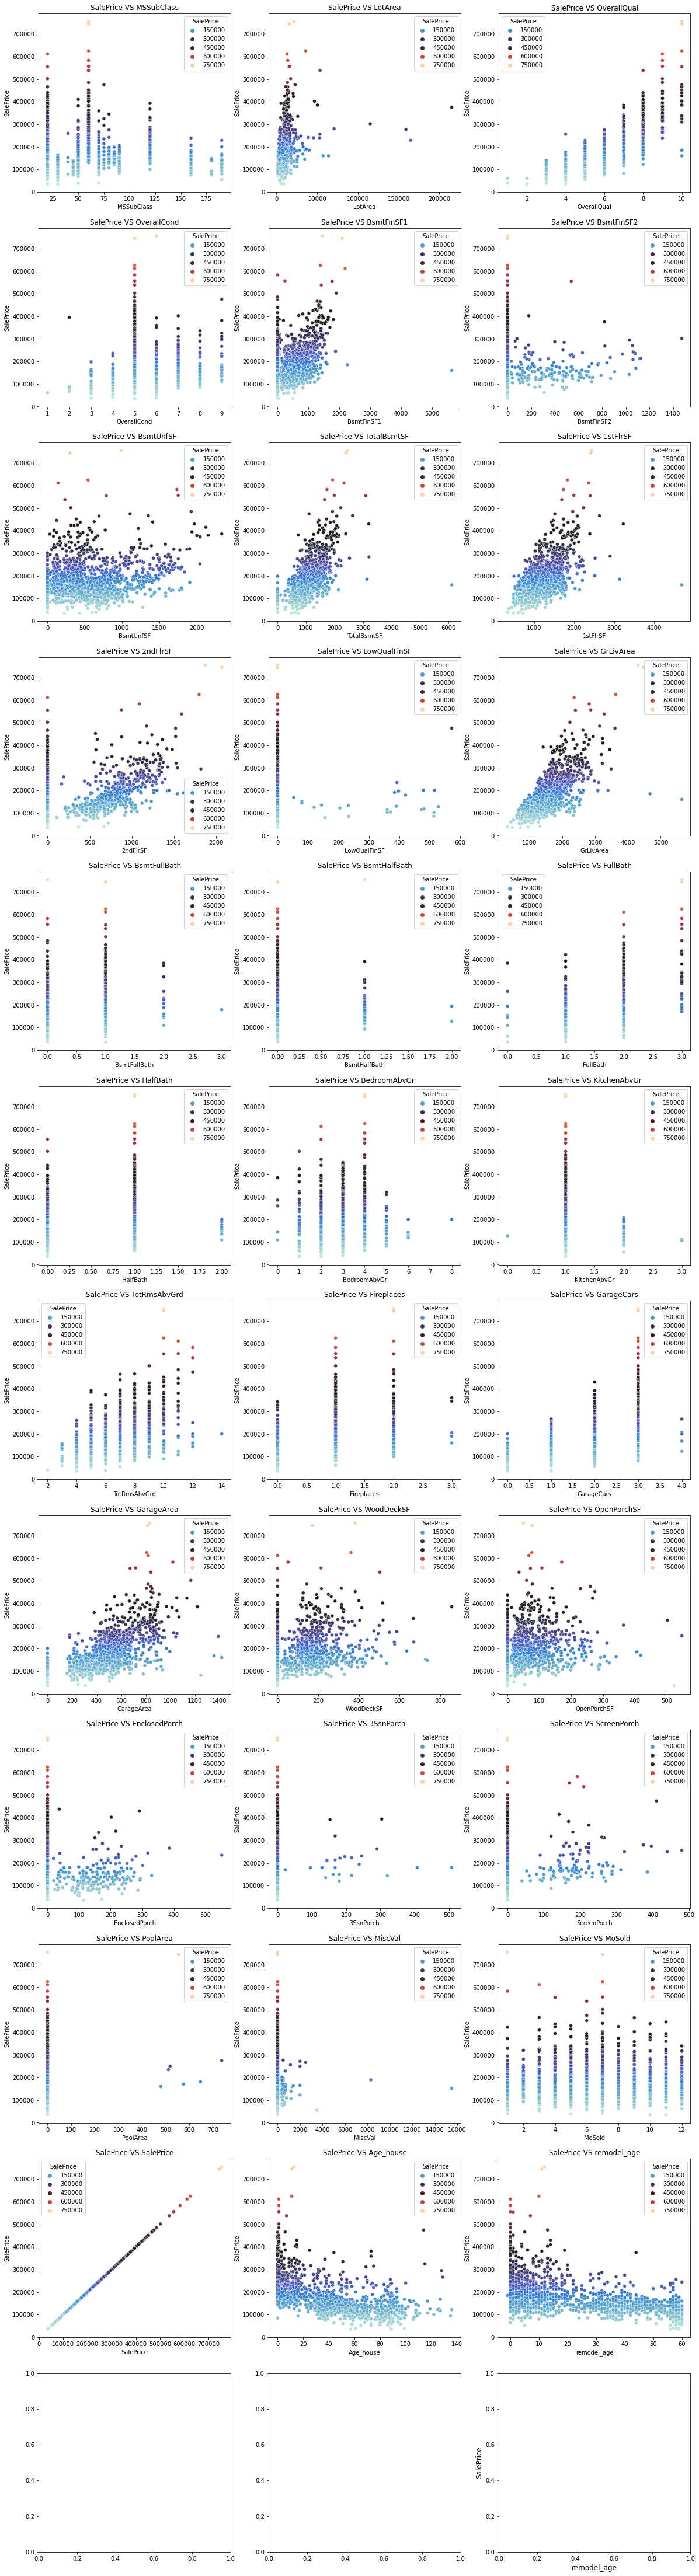

In [3248]:
#Visualising numerical predictor variables with Target Variables
df_num = df[numerical_column]
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

Observations from the above plot:-
- New properties are costlier than older properties. 
- GRLiving Area has a direct corelation with the proce of the property.
- Total basement area, which is linearly related with the total living area, also is directly proportional to the price of the property.
- Month sold has no effect on the price.

#### Plotting heatmap to check the corellation between varables

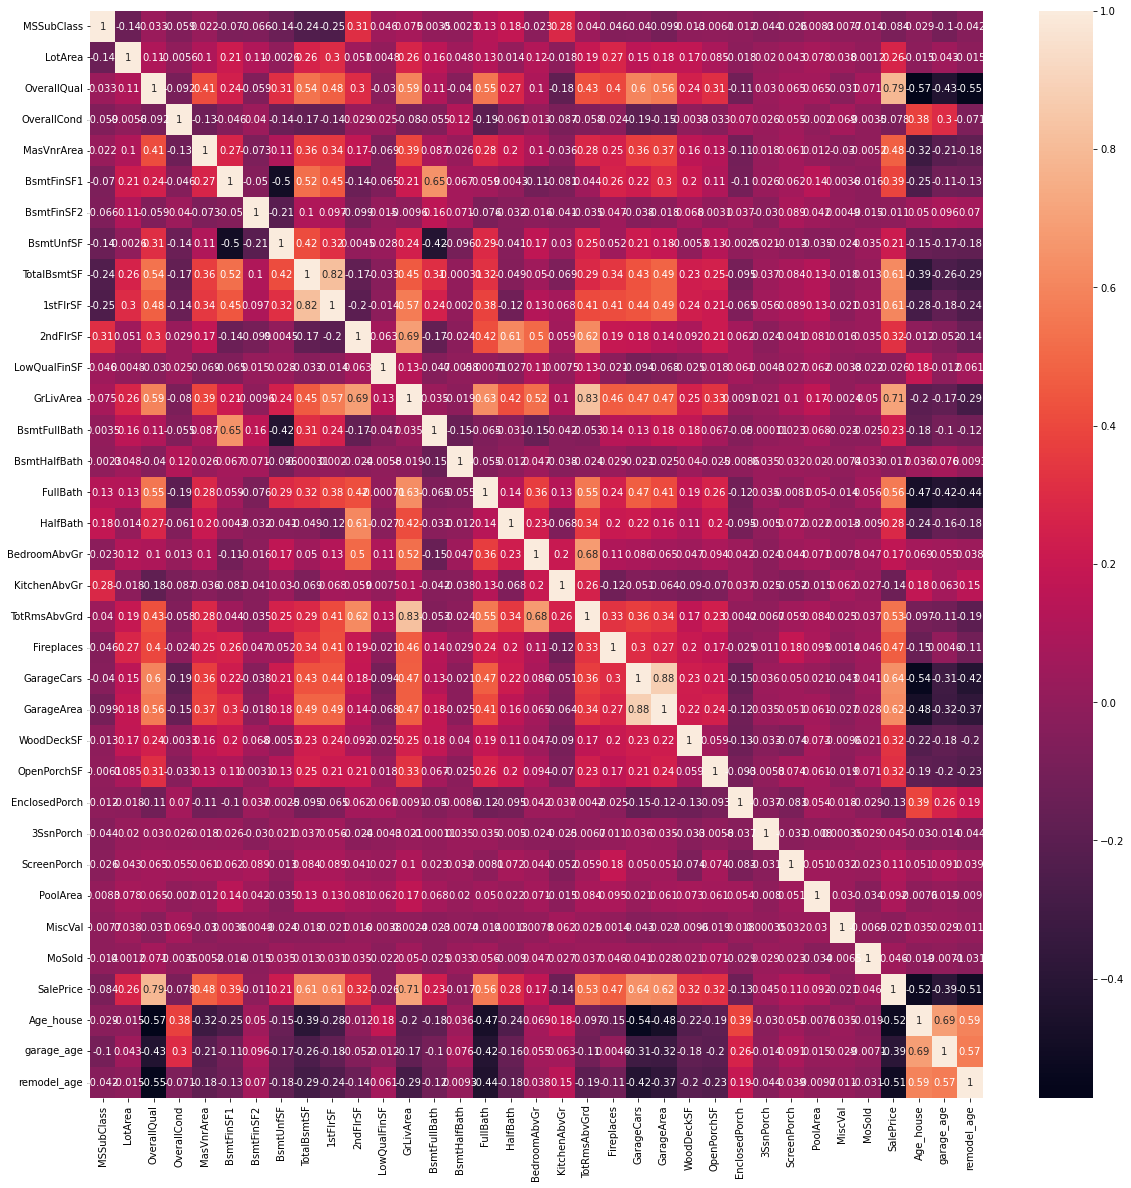

In [3249]:
plt.figure(figsize=(20,20))
sns.heatmap(df[list(df.dtypes[df.dtypes!='object'].index)].corr(),annot=True)
plt.show()

- From the Above analysism, we can see there are correlation between independent variables is present

## Treating Ouliers

#### Below function is used for hadling the outliers where i am taking the lower and upper quantile as 0.25 & 0.99 respectively

In [3250]:
df.shape

(1460, 54)

In [3251]:
num_col = list(df.dtypes[df.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df = drop_outliers(df)

In [3252]:
df.shape

(1441, 54)

### Some columns are Ordinal data in category column.

In [3253]:
df[list(df.dtypes[df.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish
0,RL,Reg,Lvl,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,Attchd,RFn
1,RL,Reg,Lvl,FR2,Veenker,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,RFn
2,RL,IR1,Lvl,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,RFn
3,RL,IR1,Lvl,Corner,Crawfor,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Detchd,Unf
4,RL,IR1,Lvl,FR2,NoRidge,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn


In [3254]:
df[['ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual','GarageFinish' ,'LotShape']].head()

,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageFinish,LotShape
0,Gd,Gd,No,GLQ,Ex,Gd,RFn,Reg
1,TA,Gd,Gd,ALQ,Ex,TA,RFn,Reg
2,Gd,Gd,Mn,GLQ,Ex,Gd,RFn,IR1
3,TA,TA,No,ALQ,Gd,Gd,Unf,IR1
4,Gd,Gd,Av,GLQ,Ex,Gd,RFn,IR1


#### Encoding ordinal Data into Digits

In [3255]:
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [3256]:
df[['ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual','GarageFinish' ,'LotShape']].head()

,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageFinish,LotShape
0,3,4,1,6,4,3,2,3
1,2,4,4,5,4,2,2,3
2,3,4,2,6,4,3,2,0
3,2,3,1,5,3,3,1,0
4,3,4,3,6,4,3,2,0


## Creating Dummy Variables

#### Creating and joining dummy column with the actual dataset

In [3257]:
dummy_col = pd.get_dummies(df[['MSZoning','LandContour','LotConfig','Neighborhood',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'GarageType']],drop_first=True)

df = pd.concat([df,dummy_col],axis=1)

df = df.drop(['MSZoning','LandContour','LotConfig','Neighborhood',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'GarageType'],axis=1)

In [3258]:
df.head()

,MSSubClass,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age_house,garage_age,remodel_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,60,8450,3,7,5,196.0,3,4,1,6,706,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,8,0,2,2,548,0,61,0,0,0,0,0,2,208500,5,5.0,5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,20,9600,3,6,8,0.0,2,4,4,5,978,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,2,6,1,2,2,460,298,0,0,0,0,0,0,5,181500,31,31.0,31,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
2,60,11250,0,7,5,162.0,3,4,2,6,486,0,434,920,4,920,866,0,1786,1,0,2,1,3,1,3,6,1,2,2,608,0,42,0,0,0,0,0,9,223500,7,7.0,6,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,70,9550,0,7,5,0.0,2,3,1,5,216,0,540,756,3,961,756,0,1717,1,0,1,0,3,1,3,7,1,1,3,642,0,35,272,0,0,0,0,2,140000,91,8.0,36,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
4,60,14260,0,8,5,350.0,3,4,3,6,655,0,490,1145,4,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,2,3,836,192,84,0,0,0,0,0,12,250000,8,8.0,8,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


In [3259]:
df.shape

(1441, 132)

## Check the distribution of our target variable before transforming.

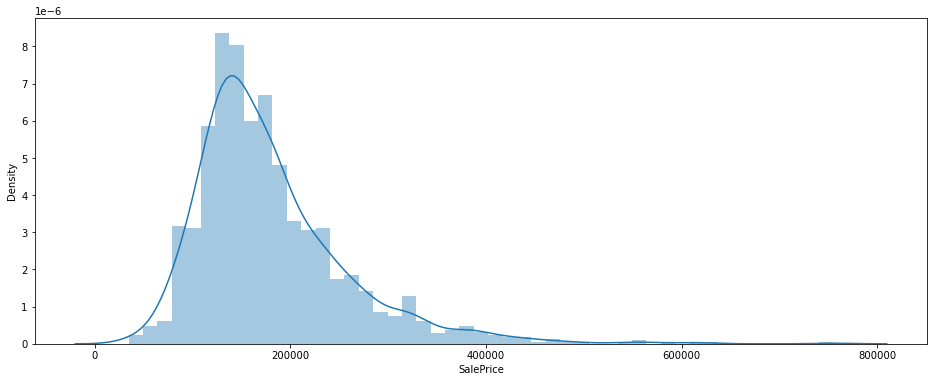

In [3260]:
plt.figure(figsize=(16,6))
sns.distplot(df.SalePrice)
plt.show()

- The target variable is normally distributed but it is left skewed.

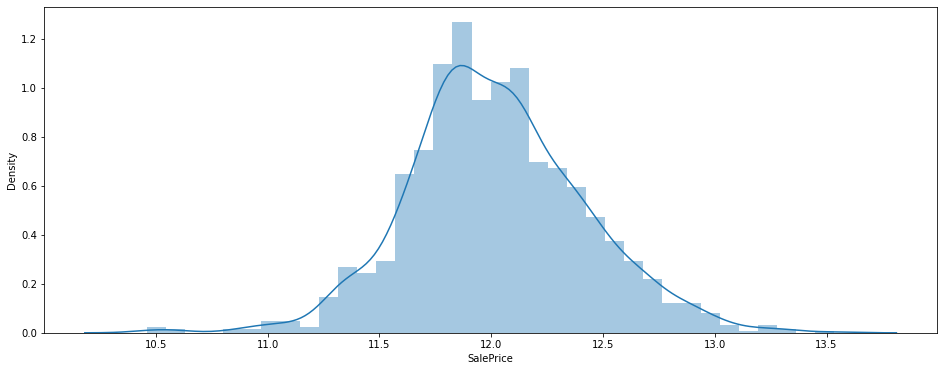

In [3261]:
# transformation of target variable using log
plt.figure(figsize=(16,6))
sns.distplot(np.log(df.SalePrice))
plt.show()

In [3262]:
# changing the Target variable in using log
df['SalePrice'] = np.log(df['SalePrice'])

## Splitting the Data into Train And Test

In [3263]:
# we need same row for test and train data respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [3264]:
print(df_train.shape)
print(df_test.shape)

(1152, 132)
(289, 132)


#### Scaling the Data

In [3265]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

#### Lets check the distribution again after scaling

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

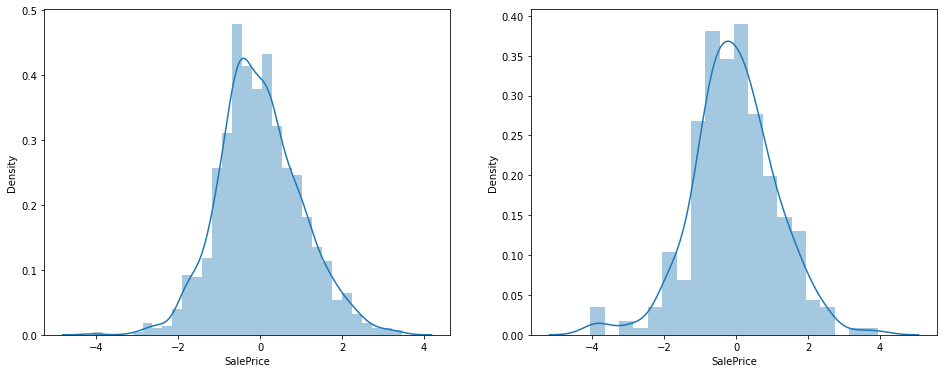

In [3266]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

#### Spliting the dependent and independent variable

In [3267]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [3268]:
y_test = df_test.pop('SalePrice')
X_test = df_test

## RFE - To get the optimal number of features

In [3269]:
X_train.head()

,MSSubClass,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age_house,garage_age,remodel_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
528,-0.639068,-0.172043,0,-1.553817,1.264474,-0.567608,2,3,2,5,-0.212889,-0.278539,-0.871918,-1.271103,4,-1.524198,-0.797852,-0.124361,-1.838940,1.100498,-0.248918,-1.024757,-0.748590,-1.072307,-0.213172,2,-0.931880,-0.951554,1,-2.356278,-2.211945,-0.761023,-0.713462,2.030691,-0.114639,-0.277302,0.0,-0.150307,7,87,0.0,5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
404,0.078949,0.052800,0,-0.068342,-0.520666,-0.567608,2,4,1,1,-1.035226,-0.278539,0.537441,-0.594208,3,-0.968217,0.991025,-0.124361,0.139360,-0.832084,-0.248918,0.791428,1.252282,0.158069,-0.213172,2,0.322239,0.618919,3,0.321997,-0.453142,-0.761023,-0.112465,-0.362274,-0.114639,-0.277302,0.0,-0.150307,5,12,12.0,11,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
108,-0.160390,-0.278249,3,-0.811080,1.264474,-0.567608,2,3,1,1,-1.035226,-0.278539,0.508173,-0.625862,2,-0.439897,0.416529,-0.124361,0.026841,-0.832084,-0.248918,0.791428,-0.748590,0.158069,-0.213172,1,0.322239,-0.951554,1,-2.356278,-2.211945,-0.761023,-0.713462,2.030691,-0.114639,-0.277302,0.0,-0.150307,8,88,0.0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
752,-0.878407,-0.147534,0,-0.068342,-0.520666,-0.567608,2,4,4,6,1.800420,-0.278539,-0.649032,1.044461,4,0.934842,-0.797852,-0.124361,-0.020213,1.100498,-0.248918,0.791428,-0.748590,0.158069,-0.213172,3,-0.304821,-0.951554,2,0.321997,0.504061,0.632418,-0.307789,-0.362274,-0.114639,-0.277302,0.0,-0.150307,7,9,9.0,9,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [3270]:
len(X_train.columns)

131

## Selecting the Top 25 Features

In [3271]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,25)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=25)

In [3272]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [3273]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

#### Lets filter the train and test set for the RFE selected columns

In [3274]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [3275]:
X_train.head()

,OverallQual,BsmtQual,GrLivArea,GarageCars,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_MeadowV,Neighborhood_StoneBr,Neighborhood_Veenker,RoofStyle_Shed,Exterior1st_BrkComm,Exterior1st_CBlock,Exterior2nd_Stone,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd
528,-1.553817,3,-1.838940,-2.356278,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
404,-0.068342,4,0.139360,0.321997,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
108,-0.811080,3,0.026841,-2.356278,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
752,-0.068342,4,-0.020213,0.321997,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1174,-0.068342,4,1.720773,0.321997,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [3276]:
X_train.columns

Index(['OverallQual', 'BsmtQual', 'GrLivArea', 'GarageCars', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'RoofStyle_Shed', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior2nd_Stone', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_Wood',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_Detchd'],
      dtype='object')

## Lasso regression model

In [3277]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
y_test_pred  = lm.predict(X_test)

print('R2 score on Train Data is : ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('R2 score on Test Data is : ',r2_score(y_true=y_test,y_pred=y_test_pred))
print('MSE is : ', mean_squared_error(y_test, y_test_pred))

R2 score on Train Data is :  0.8583622859018635
R2 score on Test Data is :  0.8162600951154326
MSE is :  0.2500909720615828


In [3278]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('OverallQual', -1.564),
 ('BsmtQual', 0.311),
 ('GrLivArea', 0.219),
 ('GarageCars', 0.338),
 ('MSZoning_FV', 0.202),
 ('MSZoning_RH', 0.558),
 ('MSZoning_RL', 0.25),
 ('MSZoning_RM', 0.548),
 ('Neighborhood_ClearCr', 0.207),
 ('Neighborhood_Crawfor', 0.278),
 ('Neighborhood_MeadowV', 0.358),
 ('Neighborhood_StoneBr', -0.13),
 ('Neighborhood_Veenker', 0.235),
 ('RoofStyle_Shed', 0.309),
 ('Exterior1st_BrkComm', 0.0),
 ('Exterior1st_CBlock', -0.709),
 ('Exterior2nd_Stone', -0.0),
 ('MasVnrType_BrkFace', -0.108),
 ('MasVnrType_None', 0.05),
 ('MasVnrType_Stone', 0.0),
 ('Foundation_Wood', 0.185),
 ('GarageType_Attchd', -0.0),
 ('GarageType_Basment', 0.3),
 ('GarageType_BuiltIn', -0.0),
 ('GarageType_Detchd', 0.22)]

### Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [3279]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [3280]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.008389,0.002130,0.001909,0.001926,0.001,{'alpha': 0.001},0.829307,0.835598,0.858420,0.835184,0.850784,0.865478,0.835083,0.874511,0.842980,0.835609,0.846295,0.014521,1,0.858782,0.861667,0.856253,0.860700,0.859522,0.854014,0.861982,0.856964,0.860961,0.860795,0.859164,0.002501
1,0.004011,0.000146,0.002375,0.001940,0.010,{'alpha': 0.01},0.817697,0.826302,0.836009,0.819894,0.840818,0.849188,0.821469,0.861619,0.847459,0.818077,0.833853,0.014695,2,0.840148,0.838721,0.837568,0.839714,0.837974,0.835959,0.839728,0.836476,0.838902,0.839718,0.838491,0.001382
2,0.003604,0.001201,0.002398,0.001958,0.100,{'alpha': 0.1},0.776901,0.768149,0.759805,0.784797,0.775681,0.782208,0.752941,0.830406,0.813746,0.780912,0.782555,0.022252,3,0.786429,0.787343,0.784424,0.786384,0.785285,0.779228,0.787667,0.781912,0.783311,0.785122,0.784710,0.002487
3,0.004001,0.000002,0.002400,0.001960,1.000,{'alpha': 1.0},-0.000725,-0.000542,-0.000288,-0.006378,-0.000858,-0.000167,-0.003048,-0.019792,-0.000003,-0.002038,-0.003384,0.005771,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.004401,0.001199,0.002402,0.001961,5.000,{'alpha': 5.0},-0.000725,-0.000542,-0.000288,-0.006378,-0.000858,-0.000167,-0.003048,-0.019792,-0.000003,-0.002038,-0.003384,0.005771,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


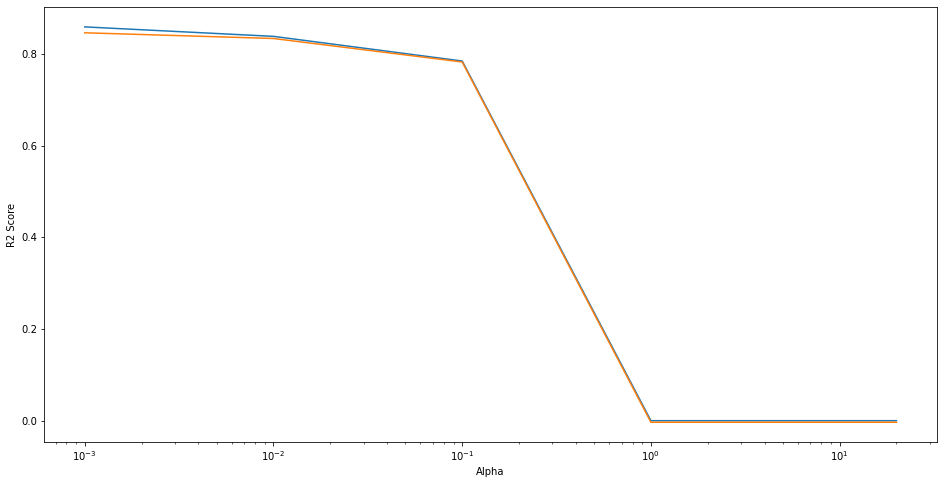

In [3281]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [3282]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [3283]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('R2 Square on Train Data :' ,r2_score(y_true=y_train,y_pred=y_train_pred))
print('R2 Square on Test Data : ' ,r2_score(y_true=y_test,y_pred=y_test_pred))
print('MSE is : ', mean_squared_error(y_test, y_test_pred))

R2 Square on Train Data : 0.8583622859018635
R2 Square on Test Data :  0.8162600951154326
MSE is :  0.2500909720615828


In [3284]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [3285]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
5,MSZoning_RH,0.558070
7,MSZoning_RM,0.548168
10,Neighborhood_MeadowV,0.357946
3,GarageCars,0.337657
1,BsmtQual,0.311058
13,RoofStyle_Shed,0.309493
22,GarageType_Basment,0.299728
9,Neighborhood_Crawfor,0.278108
6,MSZoning_RL,0.249516
12,Neighborhood_Veenker,0.234882


## Now lets use the ridge regression

In [3286]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print('R2 score on Train Data is : ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('R2 score on test Data is : ',r2_score(y_true=y_test,y_pred=y_test_pred))
print('MSE is : ', mean_squared_error(y_test, y_test_pred))

R2 score on Train Data is :  0.8659923091932418
R2 score on test Data is :  0.8116040962692558
MSE is :  0.25642831765936963


#### Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [3287]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [3288]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004602,1.280641e-03,0.002701,0.001792,0.001,{'alpha': 0.001},0.858374,0.827743,0.882334,0.848235,0.860339,0.889669,0.819759,0.873448,0.820218,0.845262,0.852538,0.023673,5,0.865317,0.869376,0.863341,0.867438,0.866224,0.861441,0.870487,0.864853,0.868237,0.867652,0.866437,0.002629
1,0.004368,1.562583e-03,0.003450,0.001921,0.010,{'alpha': 0.01},0.858166,0.827801,0.882141,0.848205,0.860280,0.889514,0.820123,0.873648,0.820843,0.845218,0.852594,0.023495,4,0.865317,0.869375,0.863340,0.867437,0.866223,0.861440,0.870486,0.864852,0.868235,0.867651,0.866436,0.002629
2,0.004000,8.529922e-07,0.002414,0.001806,0.100,{'alpha': 0.1},0.856230,0.828349,0.880324,0.847897,0.859717,0.887927,0.823231,0.875248,0.826170,0.844804,0.852990,0.021963,3,0.865255,0.869302,0.863278,0.867365,0.866153,0.861358,0.870376,0.864756,0.868135,0.867583,0.866356,0.002623
3,0.004401,1.199611e-03,0.002802,0.001834,0.200,{'alpha': 0.2},0.854348,0.828893,0.878523,0.847551,0.859148,0.886195,0.825822,0.876391,0.830572,0.844382,0.853182,0.020656,1,0.865102,0.869120,0.863127,0.867185,0.865980,0.861168,0.870113,0.864527,0.867891,0.867413,0.866163,0.002606
4,0.004001,1.789258e-03,0.002401,0.001960,0.500,{'alpha': 0.5},0.849959,0.830225,0.874227,0.846535,0.857750,0.881752,0.830463,0.877759,0.838326,0.843308,0.853030,0.018165,2,0.864402,0.868260,0.862450,0.866345,0.865173,0.860387,0.868963,0.863531,0.866802,0.866613,0.865293,0.002519


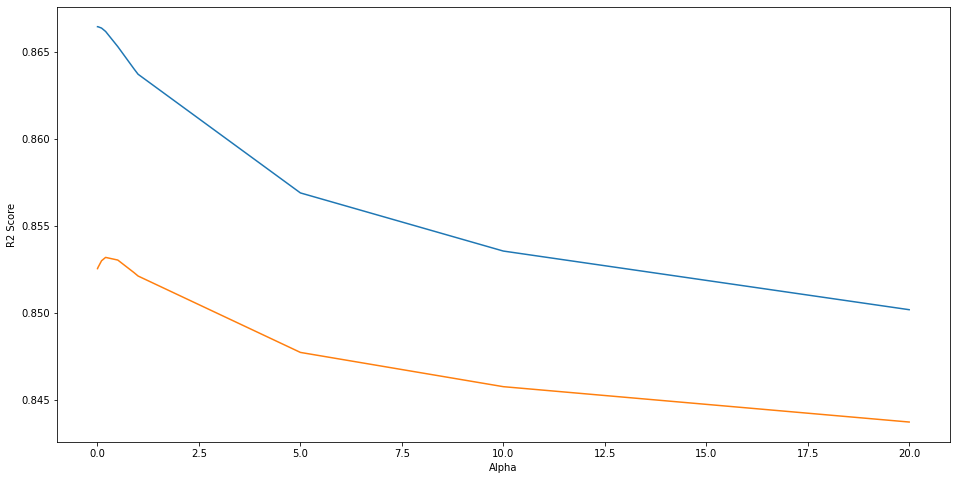

In [3289]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

#### On the basis of above graph lets create the model

In [3290]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.2}

In [3291]:
ridge = Ridge(alpha = 0.2)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

print('MSE is : ', mean_squared_error(y_test, y_test_pred))

0.8657683492256096
0.8141845348836297
MSE is :  0.25642831765936963


In [3292]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [3293]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
5,MSZoning_RH,1.355513
7,MSZoning_RM,1.316307
6,MSZoning_RL,1.078677
8,Neighborhood_ClearCr,0.989553
22,GarageType_Basment,0.601444
24,GarageType_Detchd,0.536558
20,Foundation_Wood,0.429795
13,RoofStyle_Shed,0.423759
10,Neighborhood_MeadowV,0.406971
23,GarageType_BuiltIn,0.351718


#### For Both the model R2 Score on test data is failrly same i.e 81%

### After compairing both the model - Lasso And Ridge we can see that the below top 5 Features are best explaining the DataSet

- MSZoning_RH  - Residential High Density
- MSZoning_RM  - Residential Medium Density
- GarageCars   - Size of garage in car capacity
- GarageType_Basment -  Garage location Basement Garage
- Neighborhood_MeadowV  -  Physical locations within Ames city limits
- LotArea  -  Lot size in square feet

#### Best alpha value for Lasso : {'alpha': 0.001}
#### Best alpha value for Ridge : {'alpha': 0.2}

# Subjective Questions - Demonstration/Validation

###  <b>Q1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?</b>

Ans: The Optimal value of alpha for ridge is 0.2 and for lasso it is 0.001.

##### Building Lasso Model by doubling the value of alpha to 0.002

In [3294]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)


print('R2 score on Train Data is : ',r2_score(y_true=y_test,y_pred=y_test_pred))
print('MSE is : ', mean_squared_error(y_test, y_test_pred))

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

lasso_coef.sort_values(by='Coef',ascending=False).head(10)

R2 score on Train Data is :  0.814810563978703
MSE is :  0.252063949304855


,Featuere,Coef
7,MSZoning_RM,0.340005
3,GarageCars,0.337108
1,BsmtQual,0.326290
5,MSZoning_RH,0.317185
10,Neighborhood_MeadowV,0.310499
9,Neighborhood_Crawfor,0.229323
2,GrLivArea,0.217947
4,MSZoning_FV,0.199260
22,GarageType_Basment,0.181935
13,RoofStyle_Shed,0.180462


### Building Ridge Model by doubling the value of alpha to 0.4

In [3295]:
ridge = Ridge(alpha = 0.4)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print('R2 score on Train Data is : ',r2_score(y_true=y_test,y_pred=y_test_pred))
print('MSE is : ', mean_squared_error(y_test, y_test_pred))

model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

ridge_coef.sort_values(by='Coef',ascending=False).head(10)

R2 score on Train Data is :  0.814810563978703
MSE is :  0.252063949304855


,Feaure,Coef
5,MSZoning_RH,1.202830
7,MSZoning_RM,1.168964
6,MSZoning_RL,0.921518
8,Neighborhood_ClearCr,0.841547
22,GarageType_Basment,0.567883
24,GarageType_Detchd,0.501616
13,RoofStyle_Shed,0.415038
20,Foundation_Wood,0.414182
10,Neighborhood_MeadowV,0.403874
3,GarageCars,0.341317


Since the alpha value was quite small, doubling it does not do any significant change in both the models and the R2 and MSE remains almost the same. The most important predictor variables also remain the same.

### <b>Q2. You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now,
which one will you choose to apply and why?</b>


After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them but as lasso will penalize more on the dataset and can also help in feature elemination i am goint to consider that as my final model.

##### Buidling the Final Model using Lasso Approach

In [3296]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('R2 score on Train Data is : ',r2_score(y_true=y_test,y_pred=y_test_pred))
print('MSE is : ', mean_squared_error(y_test, y_test_pred))

R2 score on Train Data is :  0.8162600951154326
MSE is :  0.2500909720615828


### <b>Q3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?</b>

The top 5 lasso predictor are : 
- MSZoning_RH  - Residential High Density
- MSZoning_RM  - Residential Medium Density
- GarageCars   - Size of garage in car capacity
- GarageType_Basment -  Garage location Basement Garage
- Neighborhood_MeadowV  -  Physical locations within Ames city limits


In [3297]:
#Removing the 5 most important predictor variables from the incoming dataset

X_test_N = X_test.drop(['MSZoning_RH','MSZoning_RM','GarageCars','GarageType_Basment','Neighborhood_MeadowV'],axis=1)
X_train_N = X_train.drop(['MSZoning_RH','MSZoning_RM','GarageCars','GarageType_Basment','Neighborhood_MeadowV'],axis=1)

# Building Lasso Model with the new dataset

lasso3 = Lasso(alpha=0.001)
lasso3.fit(X_train_N,y_train)
lasso3_coef = lasso3.coef_
y_test_pred = lasso3.predict(X_test_N)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train_N.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso3_coeff.head(5)

The R2 Score of the model on the test dataset is 0.7989977440614006
The MSE of the model on the test dataset is 0.2735870011788471
The most important predictor variables are as follows:


,Lasso Co-Efficient
MSZoning_FV,0.426716
MSZoning_RL,0.424939
OverallQual,0.380716
GrLivArea,0.375514
Neighborhood_Veenker,0.369899
